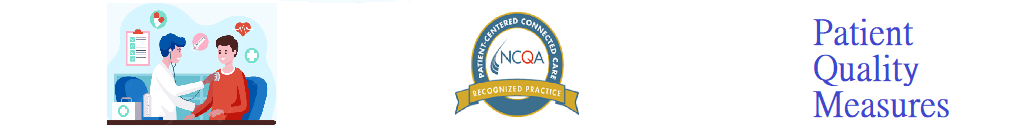

###### This solution produces a Quality Measures report for Attributed Lives
##### Developed in collaboration by Joe Eberle  and  Anna Mucha on 8/25/2022 refactored on  11/8/2022 and revised on 12/6/2022

In [1]:
# Import Libraries for Spreadsheet Automation 
import pandas as pd
import datetime as dt
from datetime import date
import time
import random
import os,glob

# Configure the code and visual settings to have consistency 
import configparser
config = configparser.ConfigParser()
config.read('config.ini') 

solution_name = 'patient_quality_measures'

In [2]:
import pandas as pd  # Import Libraries for Spreadsheet Automation 
filename = 'J:\OPA\GLIN Reporting Data Services Output\GPPC Scorecards' + '\\' + 'Patient_Quality_Measures_AL.xlsx'
patient_quality_measure_df = pd.read_excel(filename)
patient_quality_measure_df.rename(columns={'ORGANIZATION_CLASS' : 'Network',\
                                'ORGANIZATION_NAME' : 'Practice',\
                                'MEASURE_NAME_SIMPLIFIED' : 'Measure'}, inplace=True)
patient_quality_measure_df.head(2)

,Network,Practice,PROVIDER_NAME,PATIENT_NAME,Measure,TOTAL_MEASURE_COUNT,TOTAL_NOT_MET_COUNT,TOTAL_MET_COUNT,BIRTH_DATE,AGE_YEARS,GENDER,PHONE_NUMBER,PATIENT_EMPI_ID,MEASURE_QUALIFIED_NAME,PAYER_NAME,PLAN_NAME
0,General Physician PC,GPPC PCP Amherst Sheridan,"Cange, Jean","Abbott, Jaclyn K",Adult Depression Screening,1,0,1,1981-05-12,41,Female,(585) 576-3752,02ad2963-c931-4653-95f4-cebdb6ff69e1,cernerstandard.comprehensiveadultwellness.clin...,KALEIDA INCIDENT,EMPLOYEE HEALTH
1,General Physician PC,GPPC PCP Amherst Sheridan,"Cange, Jean","Abbott, Jaclyn K",Cervical Cancer Screening,1,0,1,1981-05-12,41,Female,(585) 576-3752,02ad2963-c931-4653-95f4-cebdb6ff69e1,cernerstandard.comprehensiveadultwellness.clin...,KALEIDA INCIDENT,EMPLOYEE HEALTH


In [6]:
from datetime import datetime
time_stamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f'[:-3])
status = f'\nThe patient quality measures data contains {patient_quality_measure_df.shape[0]} rows and {patient_quality_measure_df.shape[1]} columns.' 
status = status + f'\nThe patient quality measures updated at {time_stamp}.'
print(status)
print(pd.value_counts(patient_quality_measure_df['Measure'].values))
      
# pd.value_counts(patient_quality_measure_df['Network'].values)
# pd.value_counts(patient_quality_measure_df['Practice'].values)
# pd.value_counts(patient_quality_measure_df['PROVIDER_NAME'].values)


The patient quality measures data contains 173980 rows and 16 columns.
The patient quality measures updated at 2022-12-08 16:48:24.
Tobacco Use Screening                               35812
Adult Depression Screening                          31764
Colorectal Cancer Screening                         20416
Blood Pressure < 140/90 mm Hg                       15889
Advanced Care Plan                                  11696
Fall Risk Screening                                 11681
Influenza Vaccination                               10996
Cervical Cancer Screening                           10016
Breast Cancer Screening                              8598
Tobacco User Cessation Intervention                  4374
Diabetes Care: HbA1c Poor Control > 9%               4139
Diabetes Care: Eye Exam                              4138
Diabetes Care: Medical Attention for Nephropathy     4137
Adolescent Depression Screening                       210
Falls Plan of Care                                    1

## Reverse Polarity on HBA1C

In [ ]:
patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_MET_COUNT'] == 1),'TOTAL_MET_COUNT'] = 9  
patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_MET_COUNT'] == 0),'TOTAL_MET_COUNT'] = 1
patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_MET_COUNT'] == 9),'TOTAL_MET_COUNT'] = 0
patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_NOT_MET_COUNT'] == 1),'TOTAL_NOT_MET_COUNT'] = 9  
patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_NOT_MET_COUNT'] == 0),'TOTAL_NOT_MET_COUNT'] = 1
patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_NOT_MET_COUNT'] == 9),'TOTAL_NOT_MET_COUNT'] = 0

In [ ]:
df_network = patient_quality_measure_df.groupby(['Network'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 
df_measure = patient_quality_measure_df.groupby(['Measure'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 
df_provider = patient_quality_measure_df.groupby(['PROVIDER_NAME'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 
df_practice = patient_quality_measure_df.groupby(['Practice'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 
df_provider_measure = patient_quality_measure_df.groupby(['PROVIDER_NAME','Measure'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 
df_practice_measure  = patient_quality_measure_df.groupby(['Practice','Measure'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 
df_network_practice_provider_measure = patient_quality_measure_df.groupby(['Network','Practice','PROVIDER_NAME','Measure'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 
df_network_practice_measure  = patient_quality_measure_df.groupby(['Network','Practice','Measure'])['TOTAL_MEASURE_COUNT','TOTAL_NOT_MET_COUNT','TOTAL_MET_COUNT'].sum() 

# Calculate the Percentage Complete 
df_network['Percentage Complete'] =  df_network['TOTAL_MET_COUNT'] / df_network['TOTAL_MEASURE_COUNT'] 
df_measure['Percentage Complete'] = df_measure['TOTAL_MET_COUNT'] / df_measure['TOTAL_MEASURE_COUNT'] 
df_provider['Percentage Complete'] = df_provider['TOTAL_MET_COUNT'] / df_provider['TOTAL_MEASURE_COUNT'] 
df_practice['Percentage Complete'] = df_practice['TOTAL_MET_COUNT'] / df_practice['TOTAL_MEASURE_COUNT'] 
df_provider_measure['Percentage Complete'] = df_provider_measure['TOTAL_MET_COUNT'] / df_provider_measure['TOTAL_MEASURE_COUNT'] 
df_practice_measure['Percentage Complete'] = df_practice_measure['TOTAL_MET_COUNT'] / df_practice_measure['TOTAL_MEASURE_COUNT'] 
df_network_practice_provider_measure['Percentage Complete'] = df_network_practice_provider_measure['TOTAL_MET_COUNT'] / df_network_practice_provider_measure['TOTAL_MEASURE_COUNT'] 
df_network_practice_measure['Percentage Complete'] = df_network_practice_measure['TOTAL_MET_COUNT'] / df_network_practice_measure['TOTAL_MEASURE_COUNT'] 

excel_path = 'J:\OPA\GLIN Reporting Data Services Output\GPPC Scorecards\\'
filename = excel_path + 'quality_network_measure.xlsx'
df_network.to_excel(filename)
filename = excel_path + 'quality_measure.xlsx'
df_measure.to_excel(filename)
filename = excel_path + 'quality_practice_measure.xlsx'
df_practice.to_excel(filename)
filename = excel_path + 'quality_practice_measure.xlsx'
df_practice_measure.to_excel(filename)
filename = excel_path + 'quality_provider_measure.xlsx'
df_provider_measure.to_excel(filename)
filename = excel_path + 'quality_network_practice_provider_measure.xlsx'
df_network_practice_provider_measure.to_excel(filename)

In [ ]:
df_network.head()

In [ ]:
df_measure.head(15) 

In [ ]:
df_measure.loc[:, "TOTAL_MEASURE_COUNT"] = df_measure["TOTAL_MEASURE_COUNT"].map('{:,d}'.format)
df_measure.loc[:, "TOTAL_NOT_MET_COUNT"] = df_measure["TOTAL_NOT_MET_COUNT"].map('{:,d}'.format)
df_measure.loc[:, "TOTAL_MET_COUNT"] = df_measure["TOTAL_MET_COUNT"].map('{:,d}'.format)
df_measure.loc[:, "Percentage Complete"] = df_measure["Percentage Complete"].map('{:.2f}'.format)
df_measure.head(15) 

In [ ]:
df_network_practice_provider_measure.head()

In [ ]:
status = f'\nInitialize and configuring the solution {solution_name}:\n'
path = config.get(solution_name, 'path') 
Path_to_Excel = config.get(solution_name, 'Path_to_Excel') 
status = status + f'\n\tvariable Path_to_Excel set to  {Path_to_Excel}'
Path_to_Save_Excel = config.get(solution_name, 'Path_to_Save_Excel') 
status = status + f'\n\tvariable Path_to_Save_Excel set to  {Path_to_Save_Excel}'
Path_to_Publish_Excel = config.get(solution_name, 'Path_to_Publish_Excel') 
status = status + f'\n\tvariable Path_to_Publish_Excel set to  {Path_to_Publish_Excel}'
Path_to_Raw_Data = config.get(solution_name, 'Path_to_Raw_Data') 
status = status + f'\n\tvariable Path_to_Raw_Data set to  {Path_to_Raw_Data}'
Raw_Data_File_Name_1 = config.get(solution_name, 'Raw_Data_File_Name_1')  
status = status + f'\n\tvariable Raw_Data_File_Name_1 set to  {Raw_Data_File_Name_1}'
logo_file = config.get('global_infrastructure', 'logo_file')  
status = status + f'\n\tvariable logo_file set to  {logo_file}'


developing_and_testing = True
if developing_and_testing:
    print(status)

In [ ]:
# Read in the CSV SQL output for on measures at the Patient Detail level 
Patient_Gaps_in_Care = pd.read_excel(Path_to_Raw_Data + Raw_Data_File_Name_1)

# Reduce the dataset down to just the TOTAL_MET_COUNT = 0 
Patient_Gaps_in_Care = Patient_Gaps_in_Care[(Patient_Gaps_in_Care.TOTAL_MET_COUNT == 0)] 

# Simplify the output 
Patient_Gaps_in_Care = Patient_Gaps_in_Care[[ 'ORGANIZATION_NAME', 'PROVIDER_NAME',
       'PATIENT_NAME', 'MEASURE_NAME_SIMPLIFIED', 'BIRTH_DATE', 'AGE_YEARS',
       'GENDER', 'PHONE_NUMBER','PAYER_NAME', 'PLAN_NAME']] 

# Rename the columns to match the desired reporting format
Patient_Gaps_in_Care.rename(columns={'ORGANIZATION_NAME':'Practice','MEASURE_NAME_SIMPLIFIED' : 'Measure'}, inplace = True)
Patient_Gaps_in_Care.rename(str.title, axis='columns', inplace = True )

# Simplify the output 
Patient_Gaps_in_Care.head(2) 

In [ ]:
# The following function creates chunks of data into individual spreadsheets ... based upon organization name 
def Chunk_Data_Into_Reports(org_name):
    status = f'\n\nOrg Name:{org_name}' 
    Organization_panel = Patient_Gaps_in_Care[(Patient_Gaps_in_Care.Practice_Name == org_name)] 
  
    report_name = '_Patient_Care_Gaps_Attributed_Lives'
    data_rows = len(Organization_panel) - 1 
    status = status + f'\nData Rows:{str(data_rows)}'  
   
    if data_rows > 2:
        spread_name = Organization_panel['Practice_Name'].iloc[0]
   
        if spread_name == '':
            spread_name = 'No_ORG_NAME_'  
        spath =  Path_to_Excel
        
        csv_name = spath + spread_name.replace(' ','_') + report_name + '.csv'        
        spread_name = spath + spread_name.replace(' ','_') + report_name + '.xlsx'
    
        Organization_panel.to_excel(spread_name,sheet_name='Gaps in Care', index = False)  
        Organization_panel.to_csv(csv_name, index = False)  
        status = status + f'\nspreadsheat_name:{spread_name}'  
        return status

In [ ]:
Org_names = Patient_Gaps_in_Care.Practice_Name.unique()
chunker_status = '\nChunking spreadsheets up:'
for org in Org_names:
    chunker_status = chunker_status + Chunk_Data_Into_Reports(org)
    
print(chunker_status)  

In [ ]:
from openpyxl import load_workbook
from openpyxl.styles import colors
from openpyxl.utils import get_column_letter
from openpyxl.styles import NamedStyle, Font, Border, Side, PatternFill, GradientFill, Alignment, Color, Fill
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows 
from openpyxl.formatting.rule import DataBarRule
from openpyxl.formatting.rule import ColorScaleRule
import openpyxl 

In [ ]:
# The following function creates patient panels based upon organization name 
def prettify_sheet_one(work_book):
    
# Set the TAB and color it              
    ws1 = work_book.active
    ws1.title = "Patients Gaps in Care"
    Report_Description1 = "Patients Gaps in Care that are not met"
    ws1.sheet_properties.tabColor = CONTENT_TAB_COLOR 
    
# Get the redundant values and move to the report header 
    Provider_Group = ws1["A2"].value    
    today = date.today()  
    Report_Header_2 = 'Provider: ' + Provider_Group  
    
# Format the Header as text bold and backgound light blue centered wordwrap     
    max_cols = ws1.max_column + 1 
    for col in range(1,max_cols):
        ws1[get_column_letter(col) + '1'].font = Font(bold=True ) 
        ws1[get_column_letter(col) + '1'].fill = PatternFill("solid", start_color=HEADER_COLOR) 
        ws1[get_column_letter(col) + '1'].alignment = Alignment(horizontal='center', wrap_text=True)  
        ws1[get_column_letter(col) + '1'].value = ws1[get_column_letter(col) + '1'].value.replace('_','  ')
         
# If this is a report Insert rows for the report header, report description, and report run date  
    gaps_in_care_report_format = True
    if gaps_in_care_report_format: 
        ws1.insert_rows(idx=0, amount=3) # Insert rows for the report header, report description, and report run date
        ws1.delete_cols(idx=1, amount=1) # Remove the redundant provider column because it is moved to the header row    
        
# Work Sheet 1 - Patient Attribution - Set Column Widths and Header Hieght
    ws1.column_dimensions['A'].width = 25
    ws1.column_dimensions['B'].width = 25
    ws1.column_dimensions['C'].width = 35
    ws1.column_dimensions['D'].width = 10
    ws1.column_dimensions['E'].width = 10
    ws1.column_dimensions['F'].width = 10
    ws1.column_dimensions['G'].width = 15
    ws1.column_dimensions['H'].width = 14
    ws1.column_dimensions['I'].width = 20
     
# Insert rows for spreadsheet title and image
    fontStyle = Font(size = "12", bold = True)
    for col in range(1,max_cols):
        for row in range(1,2):
            ws1[get_column_letter(col) + str(row)].alignment = Alignment(horizontal='center', vertical='top', wrap_text=True)          
            ws1[get_column_letter(col) + str(row)].font = fontStyle
            ws1[get_column_letter(col) + str(row)].fill = PatternFill("solid", fgColor=BLANK_WHITE)
    
# Insert Data Services Logo    
    img = openpyxl.drawing.image.Image(Path_to_Raw_Data + logo_file)
    img.anchor = 'F1' 
    img.width = 275
    img.height = 50
    ws1.add_image(img) 
    img.alignment = Alignment(horizontal='center', vertical='center')

# Set Filtering on 
    FullRange = "A4:" + get_column_letter(ws1.max_column - 1) + str(ws1.max_row)
    ws1.auto_filter.ref = FullRange    
    
# Create The Title 
    ws1.merge_cells('A1:I1')
    ws1.row_dimensions[1].height = 40 
    top_left_cell = ws1['A1']
    top_left_cell.value = ("Patients Gaps in Care - Attributed Lives") 
    ws1.merge_cells('A2:I2')
    ws1.row_dimensions[2].height = 15

    #title
    top_left_cell.fill = PatternFill("solid", fgColor=CONTENT_TAB_COLOR)
    top_left_cell.fill = GradientFill(stop=(CONTENT_TAB_COLOR, BLANK_WHITE))
    top_left_cell.font  = Font(b=True, color="000000")
    top_left_cell.alignment = Alignment(horizontal="left", vertical="center")
    fontStyle = Font(size = "18", bold = "True")
    top_left_cell.font = fontStyle 
    
    
# Show last updated date after the merged cells    
    ws1.merge_cells('A2:I2')
    ws1.merge_cells('A3:I3')
    ws1.row_dimensions[2].height = 15    
    ws1.row_dimensions[3].height = 15
    
# Gradient Color Fill the Title in Row 1   
    top_left_cell.fill = PatternFill("solid", fgColor=CONTENT_TAB_COLOR)
    top_left_cell.fill = GradientFill(stop=(CONTENT_TAB_COLOR, BLANK_WHITE))
    top_left_cell.font  = Font(b=True, color="000000")
    top_left_cell.alignment = Alignment(horizontal="left", vertical="center")
    fontStyle = Font(size = "18", bold = "True")
    top_left_cell.font = fontStyle         

# Show last updated date and report description #1 
    Report_Header_cell2 = ws1['A2'] 
    Report_Header_cell2.value = today.strftime("Last Updated on %m/%d/%Y" + " - " + Report_Description1 )
    Report_Header_cell2.fill = PatternFill("solid", fgColor=CONTENT_TAB_COLOR)
    Report_Header_cell2.fill = GradientFill(stop=(CONTENT_TAB_COLOR, BLANK_WHITE))
    Report_Header_cell2.font  = Font(b=True, color="000000")
    Report_Header_cell2.alignment = Alignment(horizontal="left", vertical="center")    
    Report_Header_cell2.font = Font(size = "11", bold = True)        
    
# Show last updated date and report description #1 
    today = date.today()
    top_left_cell2 = ws1['A3'] 
    top_left_cell2.value = Report_Header_2
    top_left_cell2.fill = PatternFill("solid", fgColor=CONTENT_TAB_COLOR)
    top_left_cell2.fill = GradientFill(stop=(CONTENT_TAB_COLOR, BLANK_WHITE))
    top_left_cell2.font  = Font(b=True, color="000000")
    top_left_cell2.alignment = Alignment(horizontal="left", vertical="center")    
    top_left_cell2.font = Font(size = "11", bold = True)        
    
    ws1.freeze_panes = 'A5'
        
# Loop through the rows to set the desired number format 
    number_fmt = '000\.000\.0000'    
    for col in range(8,9):
        for row in range(3,ws1.max_row + 1):
            ws1[get_column_letter(col) + str(row)].number_format = number_fmt  
            
    number_fmt1 = 'mm/dd/yy'    
    for col in range(4,5):
        for row in range(3,ws1.max_row + 1):
            ws1[get_column_letter(col) + str(row)].number_format = number_fmt1  
            
    #align the phone number 
    for col in range(7,8): 
        for row in range(3,ws1.max_row + 1):
            ws1[get_column_letter(col) + str(row)].alignment = Alignment(horizontal='center', vertical='bottom', wrap_text=True)    
        
    return work_book  

In [ ]:
# Automate the worksheet 
def create_work_book(work_book):
    prettify_sheet_one(wb)
    return work_book      

In [ ]:
LIGHT_BLUE = "C5D9F1"
YELLOW = "FFFF00"
GRAY = "E4DFEC"
DEEP_BLUE = "1072BA"
DEEP_BLUE2 = "4A9CD9"
WHITE = "FFFFFF"

CONTENT_TAB_COLOR = DEEP_BLUE2
USER_TAB_COLOR = YELLOW
BLANK_WHITE = WHITE 
HEADER_COLOR = LIGHT_BLUE  # Light Blue - Light Blue indicates relevant content for validation 
HEADER_COLOR_USER_ENTRY = YELLOW # Yellow - Yellow indicates a field for User Entry 
HEADER_COLOR_INFORMATIONAL_ONLY = GRAY # Gray - Indicates a field that maybe helpful but for information purposes only 
Color_Scale_Rule = ColorScaleRule(start_type="min",start_color="FF0000",end_type="max",end_color="99FF33")
Data_Bar_Rule = DataBarRule(start_type="min", end_type="max", color="00CC00")

In [ ]:
extension = 'xlsx'
os.chdir(Path_to_Excel)
files = glob.glob('*.{}'.format(extension))
status = f'\nSaving reports to directory:{Path_to_Save_Excel}'
status = status + f'\nPublishing reports to directory:{Path_to_Publish_Excel}'
status = status + f'\n'
for x in range(len(files)): 
    wb = load_workbook(Path_to_Excel + files[x])
    org_name =  files[x].replace('.xlsx','')
    create_work_book(wb)
    wb.save(Path_to_Save_Excel + files[x])
    wb.save(Path_to_Publish_Excel + files[x])   
    status = status + f'\nSaving file:{files[x]}'
    print(Path_to_Save_Excel + files[x])   
    
print(status)  


In [ ]:
# -- PATIENT GAPS IN CARE 
# -- RANKED Quality Scores by Org Class, Organization -- Organization  - MEASURE and REGISTRY Query 
# with attributable_PCP_personnel as 
# (select prsnl_ID   from PH_D_PERSONNEL_PERSONNEL_GROUP_RELTN 
# where prsnl_group_ID IN (select prsnl_group_ID from PH_D_PERSONNEL_GROUP  where PRSNL_GROUP_name = 'Attributable PCP') 
# ), treated_lives as   
# (
# select  TL.ORGANIZATION_CLASS, TL.ORGANIZATION_NAME, TL.PROVIDER_NAME, TL.PATIENT_ID, TL.PAYER_NAME, TL.PLAN_NAME from DS_TREATED_PATIENT_DETAIL TL 
# WHERE TL.ORGANIZATION_CLASS =  'General Physician PC' and TL.ORGANIZATION_NAME ilike ('GPPC PCP%')
# AND TL.Personnel_ID in (SELECT prsnl_ID from  attributable_PCP_personnel)
# ), Attributed_lives as   
# (
# select  TL.ORGANIZATION_CLASS, TL.ORGANIZATION_NAME, TL.PROVIDER_NAME, TL.PATIENT_ID , TL.PAYER_NAME, TL.PLAN_NAME from DS_ATTRIBUTED_TREATED_LIVES TL 
# WHERE TL.ORGANIZATION_CLASS =  'General Physician PC' and TL.ORGANIZATION_NAME ilike ('GPPC PCP%')
# AND TL.Personnel_ID in (SELECT prsnl_ID from  attributable_PCP_personnel)
# AND RANK_INITIAL_PROV_BASED_ON_TOUCHPOINT = 1 
# ), Attributed_Provider_Panel_Size as
# (
# Select AL.ORGANIZATION_CLASS, AL.ORGANIZATION_NAME, AL.PROVIDER_NAME, count(distinct AL.Patient_ID)  as Number_of_Attributed_lives
# from Attributed_Lives  AL 
# GROUP BY AL.ORGANIZATION_CLASS, AL.ORGANIZATION_NAME, AL.PROVIDER_NAME
# ORDER BY Number_of_Attributed_lives DESC 
# ), Provider_Panel_Size as   
# (
# select  TL.ORGANIZATION_CLASS, TL.ORGANIZATION_NAME, TL.Personnel_ID, TL.PROVIDER_NAME, count(distinct TL.PATIENT_ID) as Panel_Size
# from DS_TREATED_PATIENT_DETAIL TL 
# WHERE TL.ORGANIZATION_CLASS =  'General Physician PC' and TL.ORGANIZATION_NAME ilike ('GPPC PCP%')
# AND TL.Personnel_ID in (SELECT prsnl_ID from  attributable_PCP_personnel)
# GROUP BY TL.ORGANIZATION_CLASS, TL.ORGANIZATION_NAME, TL.Personnel_ID, TL.PROVIDER_NAME
# ), Organization_Panel_Size as   
# (
# select  TL.ORGANIZATION_CLASS, TL.ORGANIZATION_NAME, count(distinct TL.PATIENT_ID) as Organization_Panel_Size
# from DS_TREATED_PATIENT_DETAIL TL 
# WHERE TL.ORGANIZATION_CLASS =  'General Physician PC' and TL.ORGANIZATION_NAME ilike ('GPPC PCP%')
# AND TL.Personnel_ID in (SELECT prsnl_ID from  attributable_PCP_personnel)
# GROUP BY TL.ORGANIZATION_CLASS, TL.ORGANIZATION_NAME 
# ), Attributed_Organization_Panel_Size as   
# (
# select  AL.ORGANIZATION_CLASS, AL.ORGANIZATION_NAME, count(distinct AL.PATIENT_ID) as Organization_Panel_Size
# from Attributed_Lives  AL 
# WHERE AL.ORGANIZATION_CLASS =  'General Physician PC' and AL.ORGANIZATION_NAME ilike ('GPPC PCP%')
# GROUP BY AL.ORGANIZATION_CLASS, AL.ORGANIZATION_NAME 
# )
# , measure_outcomes as 
# (select 
# tl.ORGANIZATION_CLASS as Organization_Class
# ,tl.ORGANIZATION_NAME as Organization_Name
# ,tl.PROVIDER_NAME  as Provider_Name 
# ,COALESCE(initcap(p.FULL_NAME),(initcap(p.FAMILY_NAME1) || ', ' || initcap(p.GIVEN_NAME1))) as Patient_Name 
# ,mo.fully_qualified_name as Measure_Qualified_Name
# ,case 
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening' then 'Breast Cancer Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan' Then 'Advanced Care Plan'
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam' Then 'Diabetes Care: Eye Exam' 
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9' Then 'Diabetes Care: HbA1c Poor Control > 9%'
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/medical-attention-to-nephropathy' Then 'Diabetes Care: Medical Attention for Nephropathy'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening' Then 'Cervical Cancer Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening' Then 'Colorectal Cancer Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening' Then 'Fall Risk Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care' Then 'Falls Plan of Care'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening' Then 'Tobacco Use Screening'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' Then 'Tobacco User Cessation Intervention'
# when mo.fully_qualified_name = 'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season' Then 'Influenza Vaccination'
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' Then 'Adult Depression Screening'
# when mo.fully_qualified_name = 'cernerstandard.adolescentwellness.clinical/depression-screening' Then 'Adolescent Depression Screening'
# when mo.fully_qualified_name = 'cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90' Then 'Blood Pressure < 140/90 mm Hg'
# else mo.fully_qualified_name
# end as Measure_Name_Simplified 
# ,case 
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening' then 83.0
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan' Then 43.84
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam' Then 78.00 
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9' Then 15.00
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/medical-attention-to-nephropathy' Then 97.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening' Then 85.36
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening' Then 80.0
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening' Then 91.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care' Then 91.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening' Then 97.11
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' Then 97.11
# when mo.fully_qualified_name = 'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season' Then 79.00
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' Then 88.61
# when mo.fully_qualified_name = 'cernerstandard.adolescentwellness.clinical/depression-screening' Then 88.61
# when mo.fully_qualified_name = 'cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90' Then 83.65
# else 0.00
# end as Measure_Baseline 
# ,case 
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening' then 1
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening' Then 2
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening' Then 3
# when mo.fully_qualified_name = 'cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90' Then 4
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening' Then 5
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' Then 6
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening' Then 7
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care' Then 8
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan' Then 9
# when mo.fully_qualified_name = 'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season' Then 10
# when mo.fully_qualified_name = 'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' Then 11
# when mo.fully_qualified_name = 'cernerstandard.adolescentwellness.clinical/depression-screening' Then 12
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam' Then 13
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/medical-attention-to-nephropathy' Then 14
# when mo.fully_qualified_name = 'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9' Then 15
# else 0 
# end as Measure_Order 
# ,CASE when pgrp.program_group_id is null then 'Analytics Only' else 'Registries Face Up' end as Is_Registries_Measure 
# ,COUNT(DISTINCT mo.empi_id) as Total_Measure_Count
# ,COUNT(DISTINCT CASE when state IN ('NOT_MET_DATA_AVAILABLE','NOT_MET_NO_DATA','NOT_MET') then mo.empi_Id end) as Total_Not_Met_Count 
# ,COUNT(DISTINCT CASE when state IN ('MET') then mo.empi_Id end) as Total_Met_Count
# ,max(p.BIRTH_DATE) as Birth_Date 
# ,age_in_years(current_date, max(p.BIRTH_DATE)::Date) AS Age_Years
# ,max(p.GENDER_DISPLAY) as Gender
# ,max(p.PHONE_NUMBER) as Phone_Number
# ,max(p.EMPI_ID) as Patient_EMPI_ID
# ,max(tl.PAYER_NAME) as Payer_Name
# ,max(tl.PLAN_NAME) as Plan_Name
# ,mo.Due_date as Measure_Due_Date
# ,mo.EVENT_DATE as Measure_Event_Date
# from ph_f_measure_outcome mo
# Join PH_D_PERSON p  On mo.empi_id = p.empi_id 
#   And mo.population_id = p.population_id 
#   And (p.deceased is null or p.deceased = 'false')
# -- Join treated_lives tl On mo.empi_id = tl.patient_id 
# join Attributed_lives tl On mo.empi_id = tl.patient_id  -- NOTE the TL prefix should be AL 
# Left Join (select program_group_id from PH_D_PROGRAM_GROUP where program_group_description = 'healthe-registries') pgrp
# On mo.program_group_id = pgrp.program_group_id Where state in('NOT_MET_NO_DATA','NOT_MET_DATA_AVAILABLE','MET','NOT_MET')  
# AND  
# ( mo.fully_qualified_name IN 
# ('cernerstandard.comprehensiveadultwellness.clinical/breast-cancer-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/cervical-cancer-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/colorectal-cancer-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/fall-risk-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/falls-plan-of-care'
# ,'cernerstandard.comprehensiveadultwellness.clinical/tobacco-use-screening'
# ,'cernerstandard.comprehensiveadultwellness.clinical/tobacco-user-and-cessation-intervention' 
# ,'cernerstandard.comprehensiveadultwellness.clinical/advance-care-plan'
# ,'cernerstandard.seniorwellness.org2014.clinical/influenza-vaccination-current-season'
# ,'cernerstandard.comprehensiveadultwellness.clinical/depression-screening' 
# ,'cernerstandard.adolescentwellness.clinical/depression-screening'
# )
# OR 
# (mo.fully_qualified_name IN 
# ('cernerstandard.diabetesmellitus.org2014.clinical/annual-eye-exam'
# ,'cernerstandard.diabetesmellitus.org2014.clinical/hba1c-poorly-controlled-hba1c-gt-9'
# ,'cernerstandard.diabetesmellitus.org2014.clinical/medical-attention-to-nephropathy'
# ) AND ((age_in_years(current_date, p.BIRTH_DATE::Date) >= 18) AND  (age_in_years(current_date, p.BIRTH_DATE::Date) <= 75)) 
# )
# OR 
# (mo.fully_qualified_name IN 
# ('cernerstandard.hypertension.org2014.clinical/bp-less-than-140-90'
# ) AND ((age_in_years(current_date, p.BIRTH_DATE::Date) >= 18) AND  (age_in_years(current_date, p.BIRTH_DATE::Date) <= 85)) 
# ) 
# )
# And mo.POPULATION_ID = 'a69329ea-d5a0-439c-8ef8-aa8b2f816206'
# AND pgrp.program_group_id is null 
# group by Organization_Class,Organization_Name,Provider_Name,Patient_Name,Measure_Qualified_Name,Measure_Name_Simplified,pgrp.program_group_id,Measure_Due_Date,Measure_Event_Date   
# ) 
# , Patient_Measures  as
# (
# select 
# mo.Organization_Class,mo.Organization_Name,mo.Provider_Name,mo.Patient_Name 
# ,mo.Measure_Name_Simplified 
# ,mo.Total_Measure_Count, mo.Total_Not_Met_Count, mo.Total_Met_Count 
# ,mo.Birth_Date 
# , age_in_years(current_date, mo.Birth_Date::Date) AS Age_Years
# -- , age_in_years(current_date, mo.Birth_Date::Date)||' Years '||date_part('DOY',mo.Birth_Date::Date)::int||' Days ' as Age 
# ,mo.Gender
# ,mo.Phone_Number
# ,mo.Patient_EMPI_ID
# ,mo.Measure_Qualified_Name
# ,mo.payer_name
# ,mo.plan_name 
# from measure_outcomes  mo
# where mo.Is_Registries_Measure = 'Analytics Only'
# ) , Provider_Measures  as
# (
# select 
# mo.Organization_Class,mo.Organization_Name,mo.Provider_Name, mo.Measure_Name_Simplified 
# ,sum(mo.Total_Measure_Count) as Total_Measure_Count
# ,sum(mo.Total_Not_Met_Count) as Total_Not_Met_Count
# ,sum(mo.Total_Met_Count)  as Total_Met_Count
# ,max(mo.Measure_Order) as Measure_Order 
# ,max(mo.Measure_Baseline) as Baseline
# ,TO_CHAR(((sum(mo.Total_Met_Count) / sum(mo.Total_Measure_Count)) * 100.00), 'FM999.9') as Percent_Met_fmt
# ,TO_CHAR(max(mo.Measure_Baseline) - (((sum(mo.Total_Met_Count) / sum(mo.Total_Measure_Count)) * 100.00)), 'FM999.9') as Differential_fmt 
# ,((sum(mo.Total_Met_Count) / sum(mo.Total_Measure_Count)) * 100.00) as Percent_Met
# ,max(mo.Measure_Baseline) - (((sum(mo.Total_Met_Count) / sum(mo.Total_Measure_Count)) * 100.00)) as Differential
# ,mo.Measure_Qualified_Name
# from measure_outcomes mo
# Group by mo.Organization_Class,mo.Organization_Name,mo.Provider_Name, mo.Measure_Name_Simplified , mo.Measure_Qualified_Name
# )
# select * from patient_measures 

In [ ]:
df_met = patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_MET_COUNT'] == 1)]
df_met.head()

In [ ]:
df_not_met = patient_quality_measure_df.loc[(patient_quality_measure_df['Measure'] == 'Diabetes Care: HbA1c Poor Control > 9%') & (patient_quality_measure_df['TOTAL_MET_COUNT'] == 0)]
df_not_met.head()